##### UNIVERSIDAD POLITECNICA SALESIANA

## Discovery
Es una tecnología de búsqueda de IA y búsqueda empresarial que rompe "stocks" de información o datos y recupera respuestas específicas a sus preguntas al tiempo que analiza tendencias y relaciones existentes en los datos.

Busca en diferentes formatos como:

 *PDF, tablas de Excel y PowerPoints- que son visualmente difíciles de interpretar para la búsqueda tradicional
 
-Rastrea, convierte, enriquece y normaliza datos.
-Explorar el contenido propio de forma segura, así como contenido público gratuito y con licencia.
-Aplicar enriquecimientos adicionales como conceptos, relaciones y sentimientos a través del NLU (Natural Language Understanding).


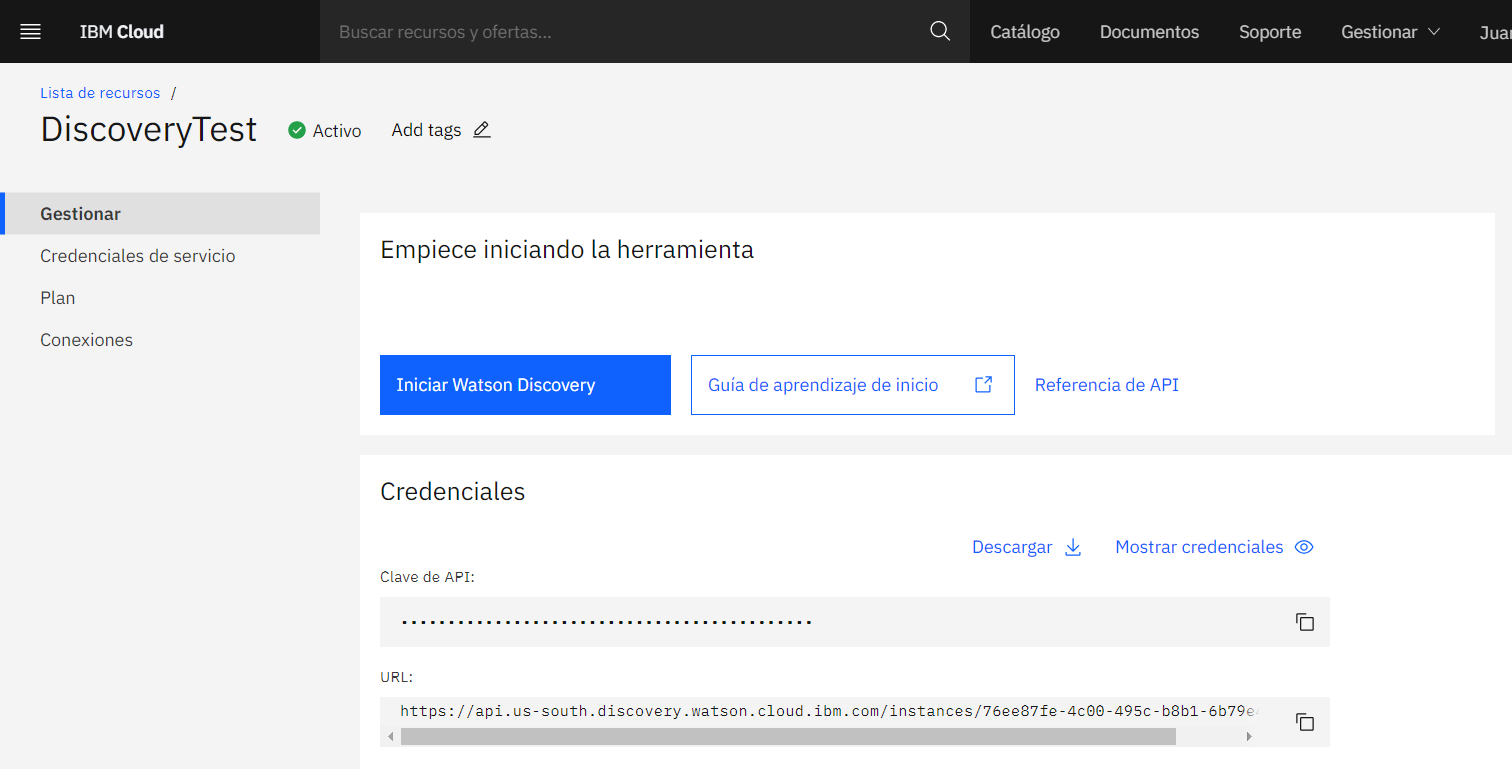

#### Crear un entorno
  *En un shell con la aplicación curl instalada, utilizamos el método POST.
##### Para crear un entorno denominado my-first-environment. 
##### Se debe sustituir {apikey} y {url} con la clave de API y el URL que se ha generado anteriormente:
#### En windows se debe al final de cada linea se debe reemplazar "^" en vez de los "/"

curl -X POST -u "apikey:{apikey}" \
-H "Content-Type: application/json" \
-d "{\"name\":\"my-first-environment\",\"description\":\"exploring environments\"}" \
"{url}/v1/environments?version=2019-04-30" '''


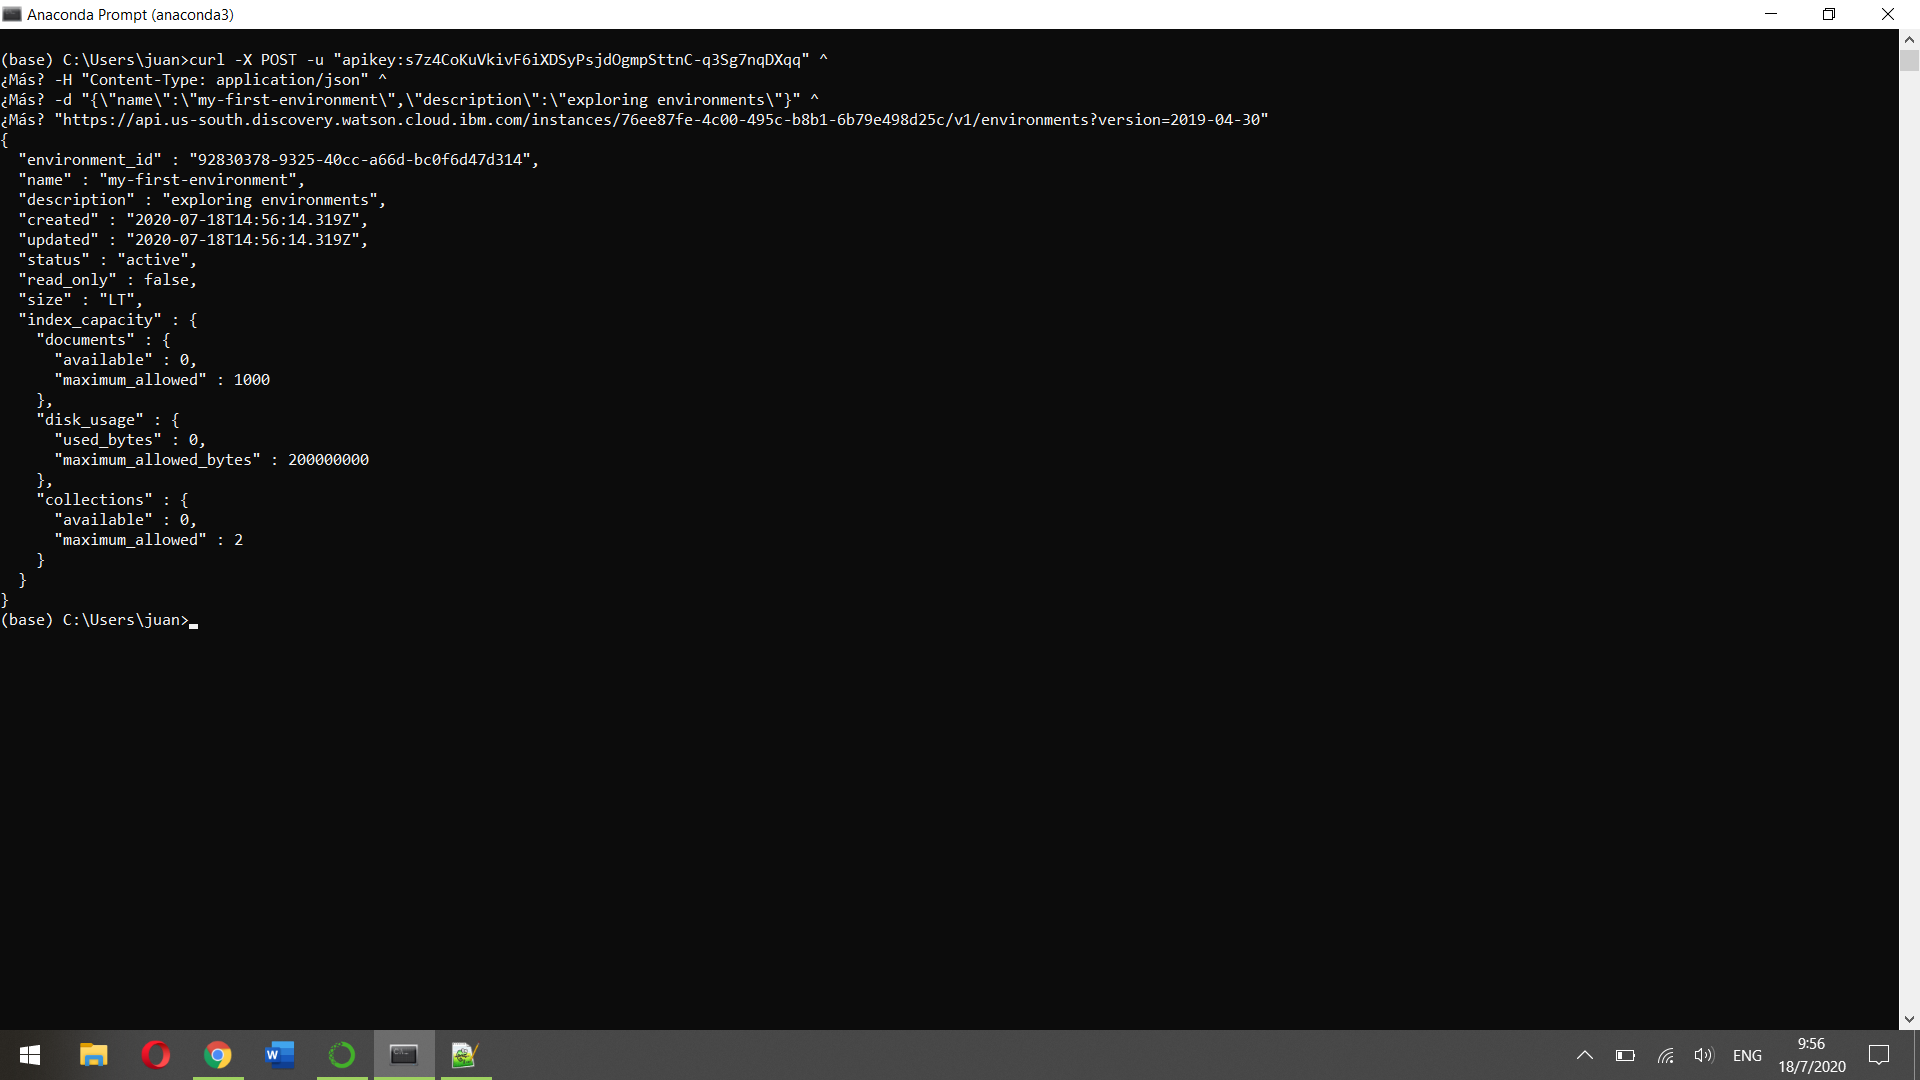

##### Para recuperar el estado del entorno. Sustituya {apikey}, {url} y {environment_id} por su información:


curl -u "apikey:{apikey}" "{url}/v1/environments/{environment_id}?version=2019-04-30"

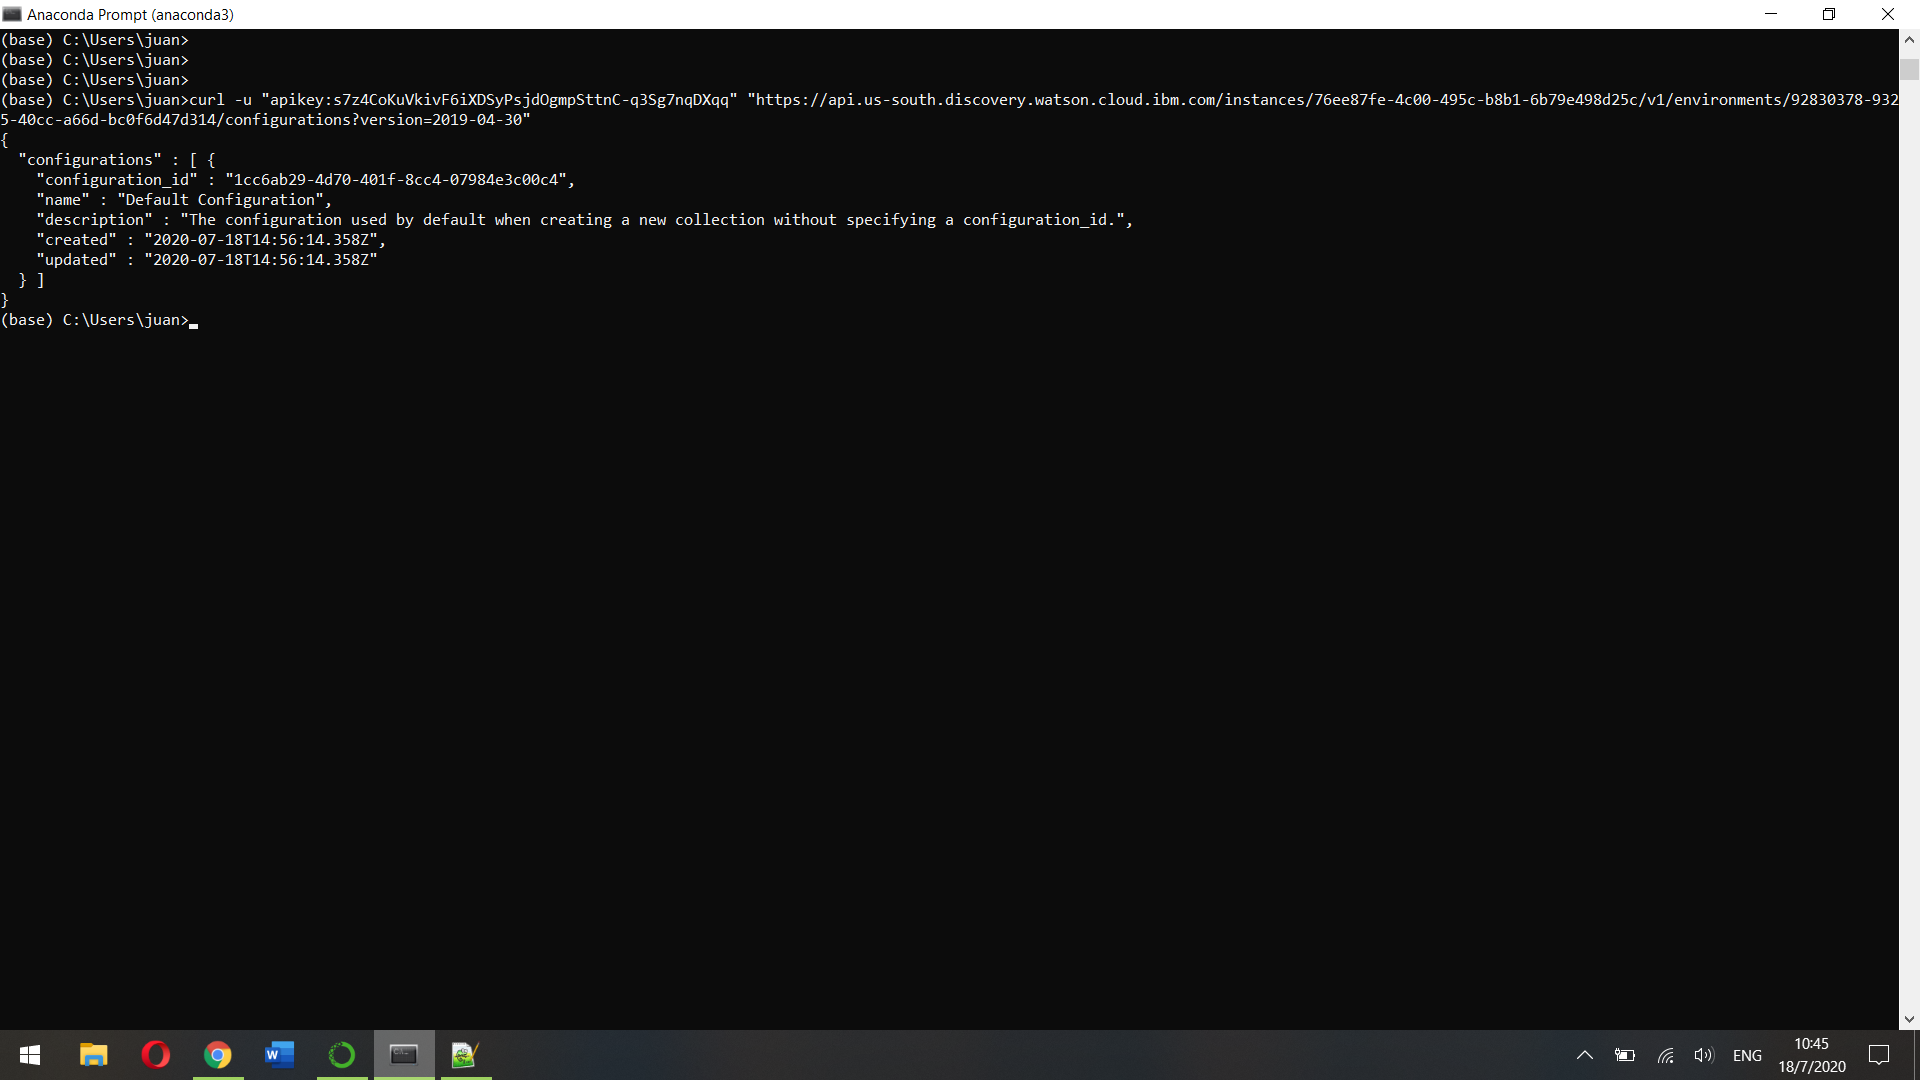

##### Crear una recopilación
###### Ahora que el entorno está listo, se procede a crear una recopilación, esto es como una caja donde se almacenan los documentos en su entorno.
Se necesitará el ID de su configuración predeterminada. Para encontrar el configuration_id, se usa el método GET /v1/environments/{environment_id}/configurations.
Se debe sustituir el {apikey}, {url} y {environment_id} por su información:
######   curl -u "apikey:{apikey}" "{url}/v1/environments/{environment_id}/configurations?version=2019-04-30"

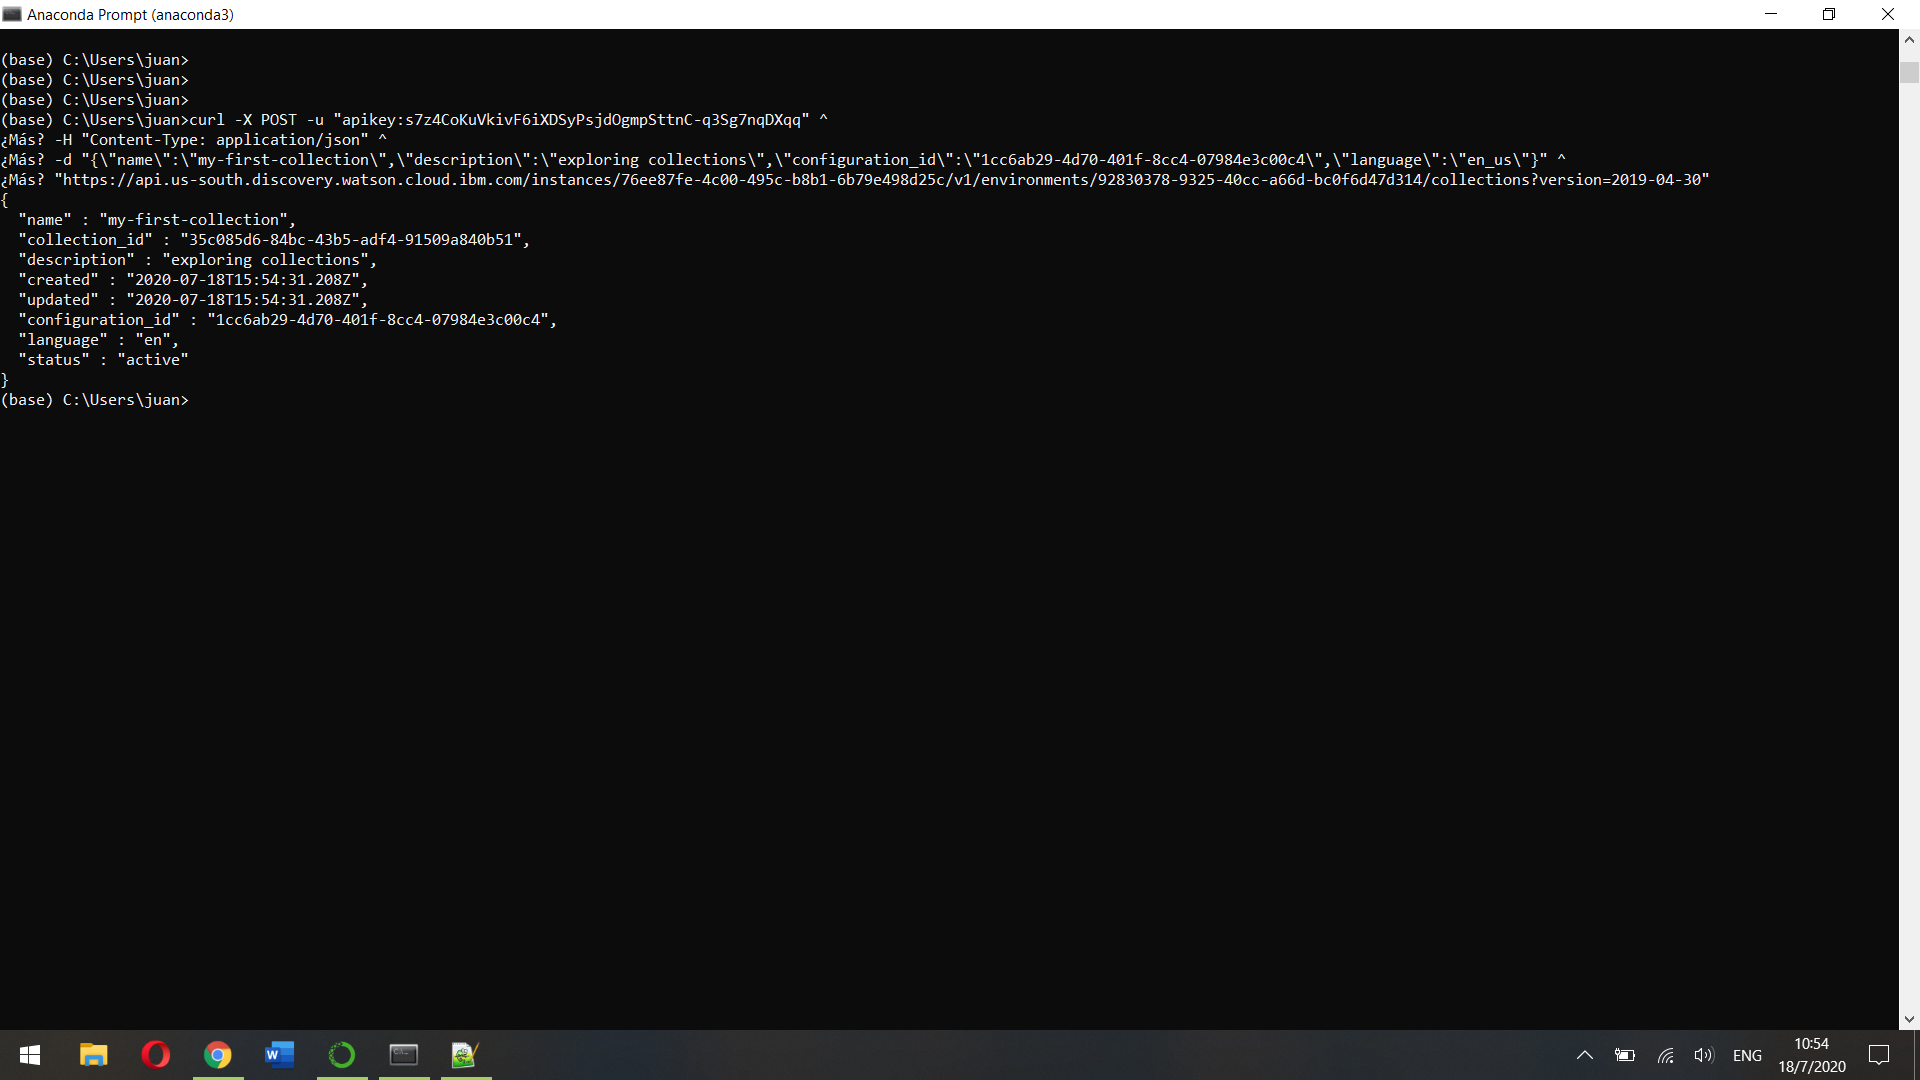

###### Se usa el método POST /v1/environments/{environment_id}/collections para crear una recopilación denominada my-first-collection. 
###### Se sustituye el {apikey}, {url}, {environment_id} y {configuration_id} por la informacion que nos asigna en nuestro servicio:

curl -X POST -u "apikey:{apikey}" \
-H "Content-Type: application/json" \
-d "{\"name\":\"my-first-collection\",\"description\":\"exploring collections\",\"configuration_id\":\"{configuration_id}\",\"language\":\"en_us\"}" \
"{url}/v1/environments/{environment_id}/collections?version=2019-04-30"


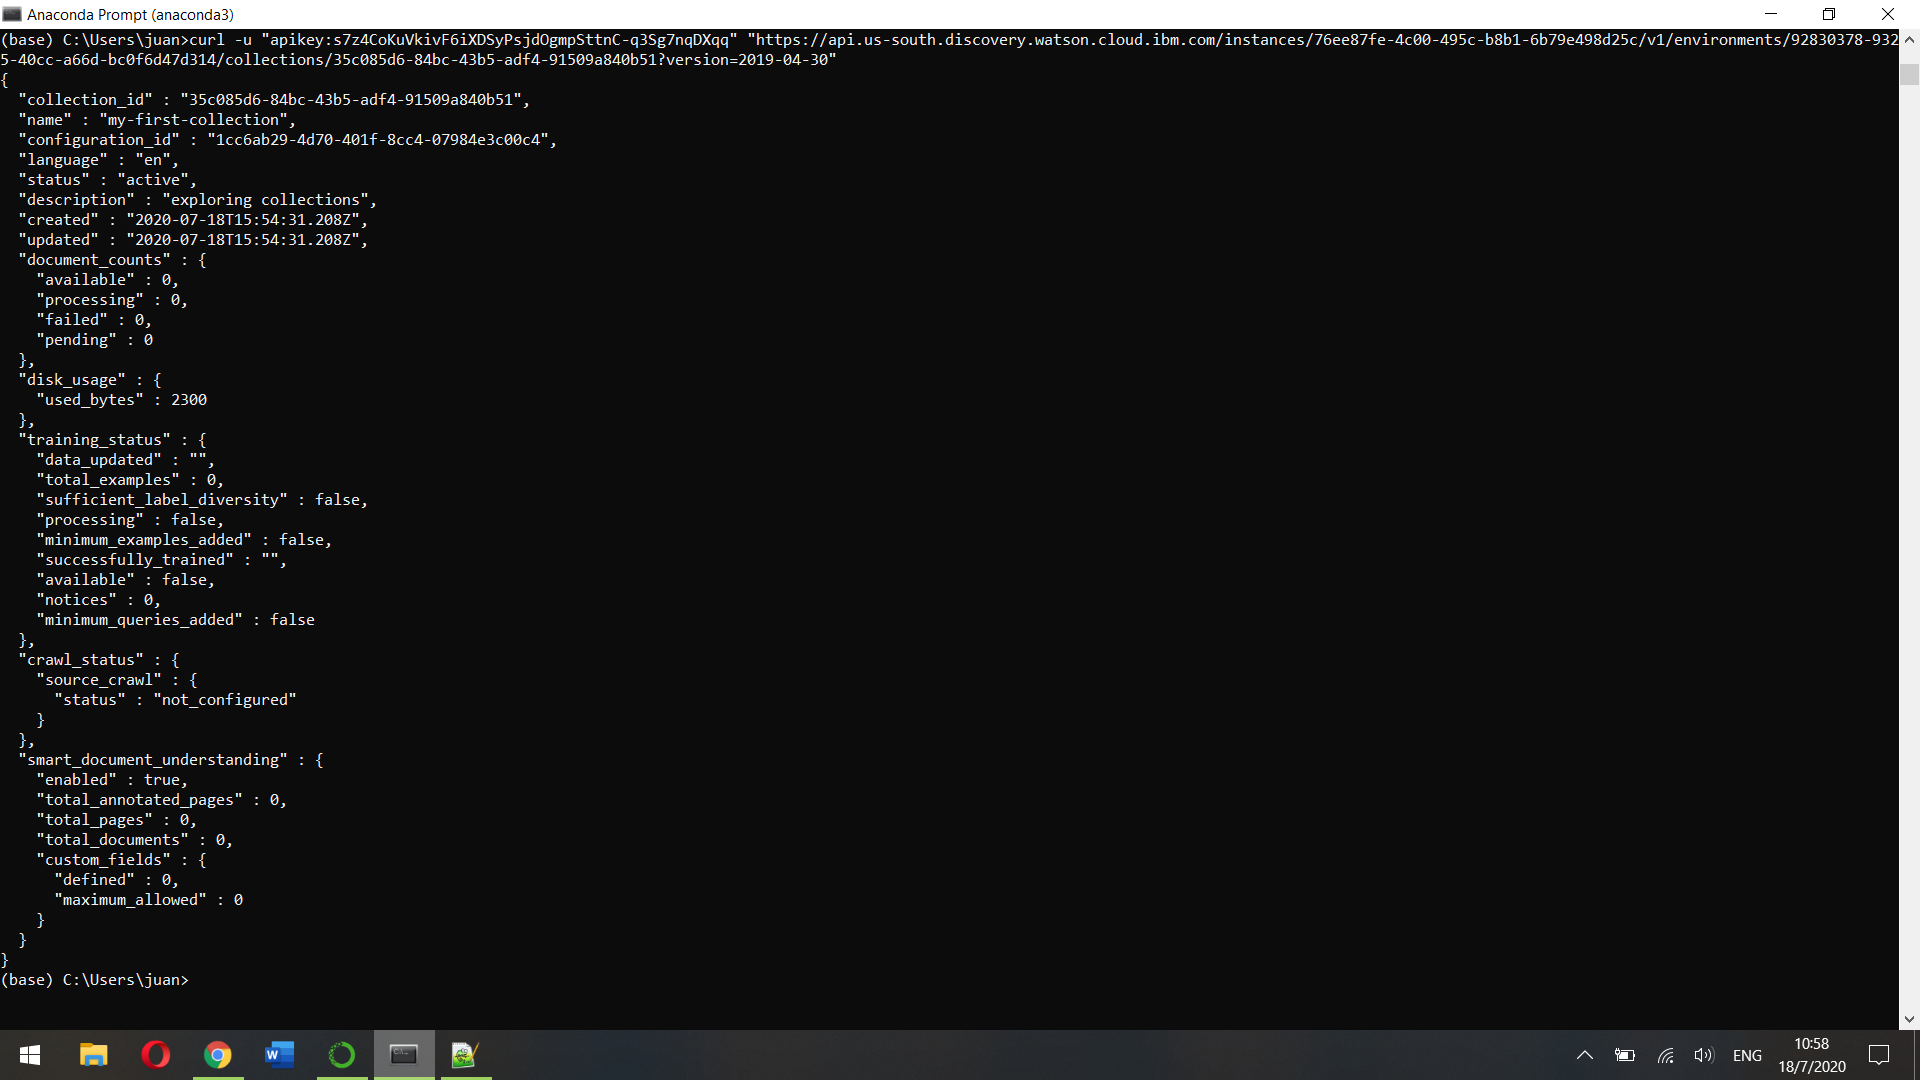

##### Cargar los documentos
###### Ahora, se añade los documentos de ejemplo a la recopilación. Este ejemplo carga el documento test doc1.html en tu recopilación.
###### Se debe sustituir {apikey}, {url}, {environment_id} y {collection_id} por su información.
###### Modificar la ubicación del documento de ejemplo para que apunte a al lugar donde guardó el archivo test-doc1.html.

###### curl -X POST -u "apikey:s7z4CoKuVkivF6iXDSyPsjdOgmpSttnC-q3Sg7nqDXqq" -F "file=@C:\Users\juan\Downloads\test\test-doc1.html" "https://api.us-south.discovery.watson.cloud.ibm.com/instances/76ee87fe-4c00-495c-b8b1-6b79e498d25c/v1/environments/92830378-9325-40cc-a66d-bc0f6d47d314/collections/35c085d6-84bc-43b5-adf4-91509a840b51/documents?version=2019-04-30"

In [1]:
import json
from ibm_watson import DiscoveryV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [15]:
authenticator = IAMAuthenticator('s7z4CoKuVkivF6iXDSyPsjdOgmpSttnC-q3Sg7nqDXqq')
discovery = DiscoveryV1(
    version='2019-04-30',
    authenticator=authenticator
)

discovery.set_service_url('https://api.us-south.discovery.watson.cloud.ibm.com/instances/76ee87fe-4c00-495c-b8b1-6b79e498d25c')

with open('C:/Users/juan/Downloads/test/test-doc1.html') as fileinfo:
    add_doc = discovery.add_document(
        '92830378-9325-40cc-a66d-bc0f6d47d314',
        '35c085d6-84bc-43b5-adf4-91509a840b51',
        file=fileinfo).get_result()
print(json.dumps(add_doc, indent=2))
environments = discovery.list_environments().get_result()
print(json.dumps(environments, indent=2))

{
  "document_id": "88c64803-853d-45f8-9185-892c45e6b185",
  "status": "pending"
}
{
  "environments": [
    {
      "environment_id": "system",
      "name": "Watson System Environment",
      "description": "Shared system data sources",
      "read_only": true
    },
    {
      "environment_id": "92830378-9325-40cc-a66d-bc0f6d47d314",
      "name": "my-first-environment",
      "description": "exploring environments",
      "created": "2020-07-18T14:56:14.319Z",
      "updated": "2020-07-18T14:56:14.319Z",
      "read_only": false
    }
  ]
}


In [20]:
import json
from ibm_watson import DiscoveryV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('s7z4CoKuVkivF6iXDSyPsjdOgmpSttnC-q3Sg7nqDXqq')
discovery = DiscoveryV1(
    version='2019-04-30',
    authenticator=authenticator
)
discovery.set_service_url('https://api.us-south.discovery.watson.cloud.ibm.com/instances/76ee87fe-4c00-495c-b8b1-6b79e498d25c')


environments = discovery.list_environments().get_result()
print(json.dumps(environments, indent=2))

news_environment_id = 'system'
print(json.dumps(news_environment_id, indent=2))

collections = discovery.list_collections(news_environment_id).get_result()
news_collections = [x for x in collections['collections']]
print(json.dumps(collections, indent=2))

configurations = discovery.list_configurations(
    environment_id=news_environment_id).get_result()
print(json.dumps(configurations, indent=2))



{
  "environments": [
    {
      "environment_id": "system",
      "name": "Watson System Environment",
      "description": "Shared system data sources",
      "read_only": true
    },
    {
      "environment_id": "92830378-9325-40cc-a66d-bc0f6d47d314",
      "name": "my-first-environment",
      "description": "exploring environments",
      "created": "2020-07-18T14:56:14.319Z",
      "updated": "2020-07-18T14:56:14.319Z",
      "read_only": false
    }
  ]
}
"system"
{
  "collections": [
    {
      "collection_id": "news-es",
      "name": "news-es",
      "language": "es",
      "status": "active",
      "description": "Watson News pre-enriched collection of curated news sources v2 (Spanish)"
    },
    {
      "collection_id": "news-ja",
      "name": "news-ja",
      "language": "ja",
      "status": "active",
      "description": "Watson News pre-enriched collection of curated news sources v2 (Japanese)"
    },
    {
      "collection_id": "news-ko",
      "name": "news-ko",

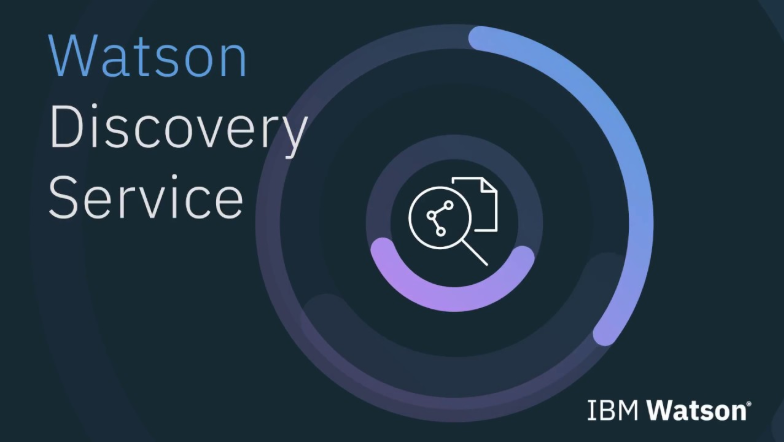

# Configuracion inicial

In [2]:
import json
from ibm_watson import DiscoveryV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [3]:
authenticator = IAMAuthenticator('0RNxVBIwUlLOBbgMXU9GHOt5dGRMymbJrRXQnf8rwQp1')
discovery = DiscoveryV1(
    version='2019-04-30',
    authenticator=authenticator
)

discovery.set_service_url('https://api.us-south.discovery.watson.cloud.ibm.com/instances/1efa3739-2323-440b-bdf2-21ceaa5e3183')

environments = discovery.list_environments().get_result()
print(json.dumps(environments, indent=2))

system_environments = [x for x in environments['environments'] if x['name'] == 'Watson System Environment']
system_environment_id = system_environments[0]['environment_id']

collections = discovery.list_collections(system_environment_id).get_result()
system_collections = [x for x in collections['collections']]
print(json.dumps(system_collections, indent=2))

{
  "environments": [
    {
      "environment_id": "system",
      "name": "Watson System Environment",
      "description": "Shared system data sources",
      "read_only": true
    },
    {
      "environment_id": "57589fdf-469c-43a4-8aa1-9648969ab012",
      "name": "my_environment",
      "description": "My environment",
      "created": "2020-07-22T23:07:23.485Z",
      "updated": "2020-07-22T23:07:23.485Z",
      "read_only": false
    }
  ]
}
[
  {
    "collection_id": "news-es",
    "name": "news-es",
    "language": "es",
    "status": "active",
    "description": "Watson News pre-enriched collection of curated news sources v2 (Spanish)"
  },
  {
    "collection_id": "news-ja",
    "name": "news-ja",
    "language": "ja",
    "status": "active",
    "description": "Watson News pre-enriched collection of curated news sources v2 (Japanese)"
  },
  {
    "collection_id": "news-ko",
    "name": "news-ko",
    "language": "ko",
    "status": "active",
    "description": "Watson Ne

In [4]:
environment_info = discovery.get_environment('system').get_result()
print(json.dumps(environment_info, indent=2))

{
  "environment_id": "system",
  "name": "Watson System Environment",
  "description": "Shared system data sources",
  "status": "active",
  "read_only": true
}


# Contador de documentos

In [5]:
res = discovery.get_collection(environment_id='system',
                               collection_id=collections['collections'][0]['collection_id']).get_result()
print(res['document_counts'])

{'available': 2838914, 'processing': 0, 'failed': 0}


# Listar Colecciones

In [8]:
collections = discovery.list_collections(environment_id='system').get_result()
print(collections)

{'collections': [{'collection_id': 'news-es', 'name': 'news-es', 'language': 'es', 'status': 'active', 'description': 'Watson News pre-enriched collection of curated news sources v2 (Spanish)'}, {'collection_id': 'news-ja', 'name': 'news-ja', 'language': 'ja', 'status': 'active', 'description': 'Watson News pre-enriched collection of curated news sources v2 (Japanese)'}, {'collection_id': 'news-ko', 'name': 'news-ko', 'language': 'ko', 'status': 'active', 'description': 'Watson News pre-enriched collection of curated news sources v2 (Korean)'}, {'collection_id': 'news-fr', 'name': 'news-fr', 'language': 'fr', 'status': 'active', 'description': 'Watson News pre-enriched collection of curated news sources v2 (French)'}, {'collection_id': 'news-de', 'name': 'news-de', 'language': 'de', 'status': 'active', 'description': 'Watson News pre-enriched collection of curated news sources v2 (German)'}, {'collection_id': 'news-en', 'name': 'news-en', 'language': 'en', 'status': 'active', 'descript

In [10]:
environments = discovery.list_environments().get_result()
print(json.dumps(environments, indent=2))

news_environment_id = 'system'
print(json.dumps(news_environment_id, indent=2))

collections = discovery.list_collections(news_environment_id).get_result()
news_collections = [x for x in collections['collections']]
print(json.dumps(collections, indent=2))

configurations = discovery.list_configurations(
    environment_id=news_environment_id).get_result()
print(json.dumps(configurations, indent=2))

query_results = discovery.query(
    news_environment_id,
    news_collections[0]['collection_id'],
    filter='extracted_metadata.sha1::f5*',
    return_fields='extracted_metadata.sha1').get_result()
print(json.dumps(query_results, indent=2))

{
  "environments": [
    {
      "environment_id": "system",
      "name": "Watson System Environment",
      "description": "Shared system data sources",
      "read_only": true
    },
    {
      "environment_id": "57589fdf-469c-43a4-8aa1-9648969ab012",
      "name": "my_environment",
      "description": "My environment",
      "created": "2020-07-22T23:07:23.485Z",
      "updated": "2020-07-22T23:07:23.485Z",
      "read_only": false
    }
  ]
}
"system"
{
  "collections": [
    {
      "collection_id": "news-es",
      "name": "news-es",
      "language": "es",
      "status": "active",
      "description": "Watson News pre-enriched collection of curated news sources v2 (Spanish)"
    },
    {
      "collection_id": "news-ja",
      "name": "news-ja",
      "language": "ja",
      "status": "active",
      "description": "Watson News pre-enriched collection of curated news sources v2 (Japanese)"
    },
    {
      "collection_id": "news-ko",
      "name": "news-ko",
      "langua

# Ejemplo

In [11]:
query_results = discovery.query(
    news_environment_id,
    news_collections[0]['collection_id'],
    filter='Amor',
    return_fields='extracted_metadata.sha1').get_result()
print(json.dumps(query_results, indent=3))

{
   "matching_results": 85435,
   "results": [
      {
         "id": "OgS3pEozQelsIwvJWVuBnoLgKc2VFqTV0mdCfUPoQGfE-P5jINtEjpA_ojSnQpIw",
         "result_metadata": {
            "score": 0
         },
         "enriched_title": {
            "entities": [
               {
                  "count": 1,
                  "sentiment": {
                     "score": 0.695409,
                     "label": "positive"
                  },
                  "text": "Martha Higareda",
                  "relevance": 0.963296,
                  "type": "Person",
                  "disambiguation": {
                     "subtype": [
                        "Actor",
                        "FilmActor",
                        "TVActor"
                     ],
                     "name": "Martha Higareda",
                     "dbpedia_resource": "http://es.dbpedia.org/resource/Martha_Higareda"
                  }
               },
               {
                  "count": 1,
              

##### Conclusiones:

*Mediante este algoritmo podemos nosotros saber el estado de un texto, lo que permite saber si es positivo o negativo, ademas nos entrega un enlace con la direccion de donde obtiene informacion en el caso de tener, un sistema de busqueda, lo que resulta muy importante para poder obtener, datos con precision. 

##### Recomendaciones:

Se debe tener creado una instancia del servicio, y tambien instalado en el entorno de python la libreria de IBM Watson

-- pip install ibm-watson

-- pip install watson-developer-cloud

##### Problemas:
    
Existen problemas con la version gratuita debido a que no hay como analizar mas archivos, solo con los que tiene de muestra